In [1]:
import numpy as np
from scipy import stats


In [2]:
# Super Parameter
# integer required 
CLocation = 1 # Center Location
width = 5 # Width 

# CLocation -=1  # python arrat start at 0

In [3]:
CuRichHEA = np.loadtxt("CuRichHEA_iSFE.txt")
EqHEA =  np.loadtxt("EqHEA_iSFE.txt")
NiRichHEA =  np.loadtxt("NiRichHEA_iSFE.txt")
Input_data = [CuRichHEA,EqHEA,NiRichHEA]

In [4]:
class_num,row_num, col_num = np.shape(Input_data)

In [5]:
Data = [[]for k in range(class_num * col_num)]
for i in np.arange(class_num * col_num):
    for j in np.arange(int(np.ceil(-width/2)),int(np.ceil(width/2)),1):
        Data[i].append(Input_data[int(i/100)][:,(i+j)%100])
Data = np.array(Data).reshape(class_num * col_num,-1)

In [6]:
CuRichHEA

array([[63.3887, 63.7202, 61.5197, ..., 62.8662, 57.5064, 61.8191],
       [65.4667, 64.657 , 62.6772, ..., 62.1268, 57.7987, 62.7874],
       [66.5339, 63.5015, 60.3742, ..., 61.1998, 58.8693, 63.4788],
       ...,
       [60.2634, 61.3227, 61.2815, ..., 59.7003, 58.5271, 61.7887],
       [60.7295, 63.6544, 61.5947, ..., 59.657 , 57.3874, 62.7873],
       [61.6192, 64.0097, 62.1902, ..., 60.1506, 58.5604, 63.197 ]])

In [7]:
# Check data
Data[0] # CuRichHEA data column 98,99,0,1,2 (CLocation = 0,width =5)

array([57.5064, 57.7987, 58.8693, 57.8797, 59.5288, 62.5889, 61.72  ,
       62.2521, 63.5007, 62.8743, 62.9839, 61.9596, 59.8802, 60.5504,
       60.9093, 58.5869, 56.7652, 57.1777, 57.1088, 58.2692, 58.5749,
       58.4436, 59.8304, 61.913 , 62.3207, 61.6444, 61.7066, 62.1625,
       62.3567, 62.011 , 63.6243, 62.1762, 62.7098, 62.817 , 62.1015,
       61.4938, 61.5114, 58.5271, 57.3874, 58.5604, 61.8191, 62.7874,
       63.4788, 63.5173, 63.6969, 63.9687, 63.1956, 63.8087, 64.3617,
       64.0742, 62.264 , 62.0861, 61.117 , 61.1784, 59.6517, 57.4326,
       57.4366, 59.6066, 60.4442, 60.6807, 60.0175, 61.8884, 63.5319,
       64.8632, 65.1996, 64.4881, 63.4245, 64.5303, 62.9379, 61.8216,
       63.2249, 61.322 , 62.0866, 64.4653, 63.4116, 63.2087, 64.0233,
       61.7887, 62.7873, 63.197 , 63.3887, 65.4667, 66.5339, 64.3002,
       63.4892, 62.5031, 62.4016, 62.0738, 60.8302, 59.7667, 59.3349,
       60.482 , 59.5178, 61.5034, 60.0649, 57.8432, 57.9299, 57.5544,
       57.415 , 57.5

In [8]:
# Input data are ******* 
# Train label is The minimum shear stresses
Label_true = np.array([[90]*100,[105]*100,[115]*100]).reshape(-1)


In [9]:
from sklearn.model_selection import train_test_split

Train_data, Test_data, Train_label, Test_label = train_test_split(Data, Label_true, test_size = 0.3)

In [10]:
# Cross Validation (To be added)
from sklearn import tree
# Make a decision tree and train
clf = tree.DecisionTreeRegressor(random_state=None)
clf.fit(Train_data, Train_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
clf.predict(Test_data)

array([ 90.,  90., 105., 115.,  90.,  90., 115., 115.,  90., 115.,  90.,
       115.,  90.,  90., 115., 105.,  90.,  90.,  90., 105., 105., 105.,
       105., 105., 115., 105.,  90., 105., 115., 115., 105., 115., 115.,
       115., 115., 115., 115., 115., 105., 105., 115., 115., 105., 115.,
       115., 115., 105.,  90., 105., 115.,  90., 105., 115., 105., 115.,
       105.,  90., 105.,  90.,  90., 105.,  90., 105.,  90., 105., 105.,
        90., 115.,  90., 115., 115., 105.,  90., 115., 115., 115., 105.,
       105., 115., 105., 115., 115.,  90., 105., 115.,  90.,  90., 105.,
       115.,  90.])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(Test_label,clf.predict(Test_data))

0.6333333333333333

[Text(71.53846153846153, 208.38, 'X[33] <= 59.492\nentropy = 103.629\nsamples = 210\nvalue = 103.881'),
 Text(22.892307692307693, 190.26, 'X[81] <= 63.204\nentropy = 54.123\nsamples = 48\nvalue = 92.708'),
 Text(11.446153846153846, 172.14, 'entropy = 0.0\nsamples = 41\nvalue = 90.0'),
 Text(34.33846153846154, 172.14, 'X[123] <= 61.647\nentropy = 76.531\nsamples = 7\nvalue = 108.571'),
 Text(22.892307692307693, 154.01999999999998, 'entropy = 0.0\nsamples = 1\nvalue = 90.0'),
 Text(45.784615384615385, 154.01999999999998, 'X[51] <= 63.773\nentropy = 22.222\nsamples = 6\nvalue = 111.667'),
 Text(34.33846153846154, 135.89999999999998, 'entropy = 0.0\nsamples = 4\nvalue = 115.0'),
 Text(57.23076923076923, 135.89999999999998, 'entropy = 0.0\nsamples = 2\nvalue = 105.0'),
 Text(120.18461538461538, 190.26, 'X[193] <= 58.942\nentropy = 70.352\nsamples = 162\nvalue = 107.191'),
 Text(80.12307692307692, 172.14, 'X[136] <= 61.229\nentropy = 69.0\nsamples = 20\nvalue = 94.0'),
 Text(68.6769230769230

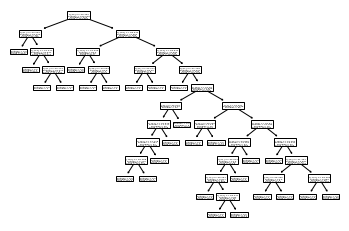

In [19]:
tree.plot_tree(clf)

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 10, random_state = None)
model.fit(Train_data,Train_label)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [15]:
model.predict(Test_data)

array([112. ,  96.5, 107. , 107. ,  99.5,  93. , 109. , 102. ,  91.5,
       106.5,  92.5,  99.5,  90. , 107.5, 111.5, 102.5, 108. ,  92.5,
        90. , 107. , 104.5, 106.5, 110. , 110. , 109. , 110. , 100.5,
       104. , 107.5, 107. , 102.5, 106. , 109. ,  99. , 107. , 107. ,
        95.5, 102.5, 109. , 103.5, 110.5,  96.5, 110. , 109.5, 103. ,
       112. , 108. ,  90. , 102. , 105.5,  97.5, 108. , 102.5, 103.5,
       108. , 108.5, 100.5, 104.5,  90. ,  95.5, 104. ,  96.5, 100. ,
        99. , 106. , 109.5,  92.5, 102.5, 109.5, 106.5, 108. , 114. ,
        90. , 110. , 103.5, 110. , 108. , 112. , 108. , 104.5, 110. ,
        95. ,  95. , 107.5, 107.5,  99.5,  95. , 106.5, 103. ,  90. ])

In [16]:
#each estimators in random forest
#model.estimators_[1]

In [17]:
# np.set_printoptions(threshold=np.inf)
# model.feature_importances_

In [18]:
#display feature importances_
# clf.feature_importances_